In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Назождение скорости звука

In [15]:
data = pd.read_csv("d_by_freq.csv")
L = 795 #длина резонатора в мм
data['sin'] = data['d[mm]'] / L
lamb = 650 # длина волны лазера в нанометрах
data['Lambda'] = 650 / (1e3 * data['sin']) #длина волны в мкм
data['V'] = data['Lambda'] * data['freq[MHz]']

In [16]:
print(f"Скорость звука: {np.mean(data['V']):.2f} +/- {np.std(data['V']):.2f} м/c")

Скорость звука: 3476.34 +/- 65.58 м/c


In [17]:
data

,freq[MHz],d[mm],sin,Lambda,V
0,100,15.0,0.018868,34.450000,3445.000000
1,95,14.0,0.017610,36.910714,3506.517857
2,90,13.0,0.016352,39.750000,3577.500000
3,85,12.5,0.015723,41.340000,3513.900000
4,80,12.0,0.015094,43.062500,3445.000000
5,75,11.5,0.014465,44.934783,3370.108696


### Распределение в максимумах

In [19]:
data = pd.read_csv("raspredelenie_maximumov.csv")
data

,freq,noise,maximum_center,maximum_left,maximum_right,v_del_side,v_del_center
0,57,0.05,0.42,0.27,0.225,0.05,0.1


In [20]:
data['maximum_center'] -= data.noise
data['maximum_left'] -= data.noise
data['maximum_right'] -= data.noise

Центр 0    0.48366
dtype: float64
Левый 0    0.287582
dtype: float64
правый 0    0.228758
dtype: float64


/home/vladimir/.conda/envs/labs/lib/python3.12/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


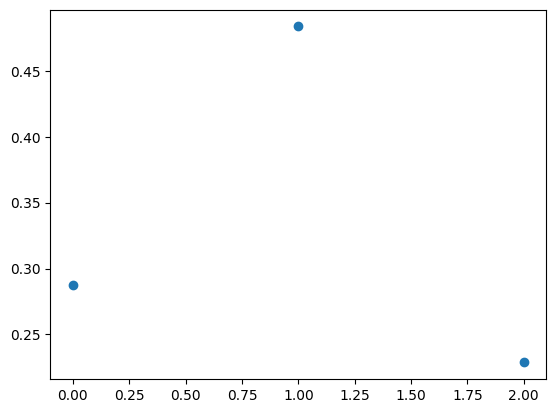

In [24]:
s = data['maximum_center'] + data['maximum_left'] + data['maximum_right']
intens = [data['maximum_left'] / s, data['maximum_center'] / s, data['maximum_right'] / s]
print("Центр", data['maximum_center'] / s)
print("Левый", data['maximum_left'] / s)
print("правый", data['maximum_right'] / s)

plt.scatter(np.arange(3), intens)

### Мощность

In [27]:
data = pd.read_csv("moshnost_side_maximum.csv")
data

,I[mkA],amp[V]
0,95,0.25
1,75,0.23
